In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("deceptive-opinion.csv")
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [4]:
source_df = df.groupby('source')
source_df.describe()

deceptive                        hotel                           \
                count unique        top freq count unique               top   
source                                                                        
MTurk             800      1  deceptive  800   800     20  intercontinental   
TripAdvisor       400      1   truthful  400   400     20           sofitel   
Web               400      1   truthful  400   400     20           sofitel   

                 polarity                        text         \
            freq    count unique       top freq count unique   
source                                                         
MTurk         40      800      2  negative  400   800    800   
TripAdvisor   20      400      1  positive  400   400    400   
Web           20      400      1  negative  400   400    396   

                                                                     
                                                           top freq  
source                                                               
MTurk        Stayed at Fairmont Chicago Millennium Park and...    1  
TripAdvisor  We stayed in the Conrad for 4 nights just befo...    1  
Web          The Omni was chosen for it's location whichwor...    2

In [5]:
df[df.deceptive == 'deceptive'].groupby('polarity').describe()

deceptive                        hotel                      source  \
             count unique        top freq count unique      top freq  count   
polarity                                                                      
negative       400      1  deceptive  400   400     20  sofitel   20    400   
positive       400      1  deceptive  400   400     20  sofitel   20    400   

                             text         \
         unique    top freq count unique   
polarity                                   
negative      1  MTurk  400   400    400   
positive      1  MTurk  400   400    400   

                                                                  
                                                        top freq  
polarity                                                          
negative  Stayed at Fairmont Chicago Millennium Park and...    1  
positive  We stayed at the beautiful Millennium Knickerb...    1

In [6]:
df.groupby('deceptive').describe()

hotel                               polarity                        \
          count unique               top freq    count unique       top freq   
deceptive                                                                      
deceptive   800     20  intercontinental   40      800      2  negative  400   
truthful    800     20  intercontinental   40      800      2  negative  400   

          source                     text         \
           count unique    top freq count unique   
deceptive                                          
deceptive    800      1  MTurk  800   800    800   
truthful     800      2    Web  400   800    796   

                                                                   
                                                         top freq  
deceptive                                                          
deceptive  Stayed at Fairmont Chicago Millennium Park and...    1  
truthful   My daughter and I woke in the morning wanting ...    2

In [8]:
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

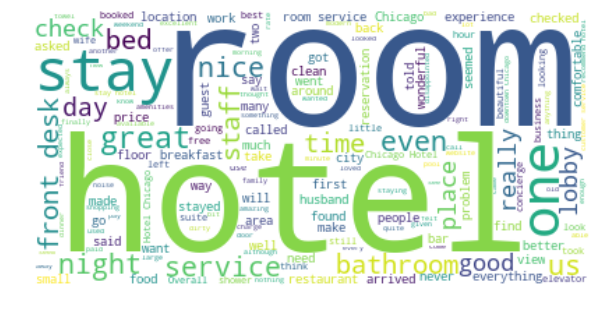

In [9]:
text = ' '.join(df.text.values)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig('wordcloud.png', dpi=300, transparent=True)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Building models

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], test_size=0.3, random_state=342423)

#### Count Vectorizer

In [31]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

#### TF-IDF Vectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

/home/mhassan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [33]:
class_labels=['truthful', 'deceptive']

#### Models on TFIDF Vectorizer

Confusion matrix, without normalization
             precision    recall  f1-score   support

  deceptive       0.83      0.93      0.88       239
   truthful       0.92      0.81      0.86       241

avg / total       0.88      0.87      0.87       480



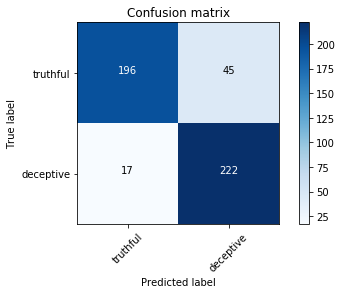

In [34]:
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
cm = metrics.confusion_matrix(y_test, pred, labels=class_labels)
plot_confusion_matrix(cm, classes=class_labels)
print(classification_report(y_test, pred))

Confusion matrix, without normalization
             precision    recall  f1-score   support

  deceptive       0.87      0.83      0.85       239
   truthful       0.84      0.88      0.86       241

avg / total       0.86      0.86      0.86       480



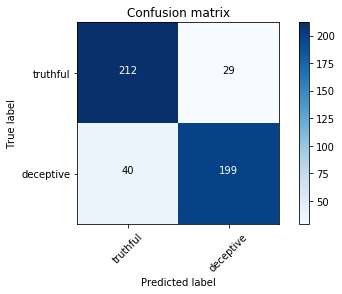

In [36]:
clf = PassiveAggressiveClassifier(n_iter=100)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
cm = metrics.confusion_matrix(y_test, pred, labels=class_labels)
plot_confusion_matrix(cm, classes=class_labels)
print(classification_report(y_test, pred))

In [37]:
feature_names = count_vectorizer.get_feature_names()
# Truthful
print([f for _, f in sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]])
# Deceptive
print([f for _, f in sorted(zip(clf.coef_[0], feature_names))[:20]])

['slumber', 'locating', 'floor', 'ritzy', 'elevators', 'conference', 'priceless', 'nightmares', 'strawberries', 'rash', 'concierge', 'updating', 'quickly', 'charge', 'rooms', 'construction', 'breakfast', 'good', 'check', 'laquinta']
['chicago', 'luxuriously', 'food', 'recent', 'touts', 'finally', 'atmosphere', 'vaca', 'experience', 'luxuries', 'millenium', 'look', 'clerk', 'homewood', 'husand', 'accommodations', 'decided', 'stayed', 'arrived', 'dining']


#### Models on Count Vectorizer

Confusion matrix, without normalization
             precision    recall  f1-score   support

  deceptive       0.85      0.91      0.88       239
   truthful       0.90      0.84      0.87       241

avg / total       0.88      0.88      0.87       480



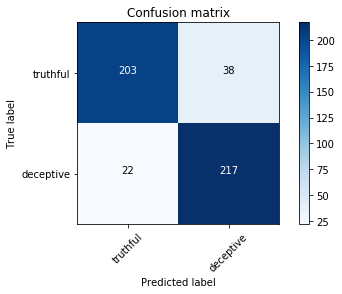

In [38]:
clf = MultinomialNB()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred, labels=class_labels)
plot_confusion_matrix(cm, classes=class_labels)
print(classification_report(y_test, pred))

Confusion matrix, without normalization
             precision    recall  f1-score   support

  deceptive       0.85      0.85      0.85       239
   truthful       0.85      0.85      0.85       241

avg / total       0.85      0.85      0.85       480



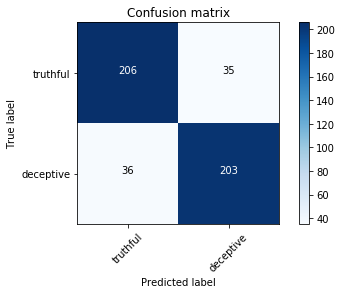

In [39]:
clf = PassiveAggressiveClassifier(n_iter=50)
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred, labels=class_labels)
plot_confusion_matrix(cm, classes=class_labels)
print(classification_report(y_test, pred))

In [40]:
feature_names = count_vectorizer.get_feature_names()
# Truthful
print([f for _, f in sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]])
# Deceptive
print([f for _, f in sorted(zip(clf.coef_[0], feature_names))[:20]])

['small', 'floor', 'location', 'upgraded', 'conference', 'bell', 'concierge', 'nights', 'priceline', 'river', 'elevator', 'roomy', 'problems', 'large', 'construction', 'window', 'street', 'second', 'michigan', 'helpful']
['luxury', 'food', 'atmosphere', 'spa', 'recently', 'heart', 'vacation', 'fantastic', 'chicago', 'looked', 'homewood', 'luxurious', 'definitely', 'finally', 'overall', 'decided', 'beat', 'towels', 'husband', 'liked']


#### Evaluate model with a different review

In [41]:
clf.predict(count_vectorizer.transform(['We stayed at hilton during our trip to chicago. \
                                        We liked the cleanliness. The hotel was really great.']))[0]

'deceptive'

In [42]:
clf.predict(count_vectorizer.transform(['We found this hotel through priceline which was \
                                        really helpful. The hotel lobby was nicely decorated, \
                                        very clean. We booked a suite that was very large.']))[0]

'truthful'

### Train models in temporal words

In [28]:
temporal_df = pd.read_csv("deceptive-opinion_v3.csv")
temporal_df.dropna(inplace=True)
temporal_df['SUTime'] = temporal_df.SUTime.apply(lambda x: x.replace('"', ''))
temporal_df.head()

,deceptive,hotel,polarity,source,text,SUTime
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"night, thursday, friday morning"
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"the past several months, late October 2007, ni..."
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,3 minutes
5,truthful,omni,positive,TripAdvisor,I stayed at the Omni for one night following a...,"night, night, the day, more than about 30 seconds"
6,truthful,conrad,positive,TripAdvisor,We stayed in the Conrad for 4 nights just befo...,"nights, Thanksgiving"


In [29]:
X_train, X_test, y_train, y_test = train_test_split(temporal_df['SUTime'], temporal_df['deceptive'], test_size=0.02, random_state=533)

In [30]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

accuracy:   0.689
Confusion matrix, without normalization
             precision    recall  f1-score   support

  deceptive       0.69      0.63      0.66       568
   truthful       0.69      0.74      0.72       631

avg / total       0.69      0.69      0.69      1199



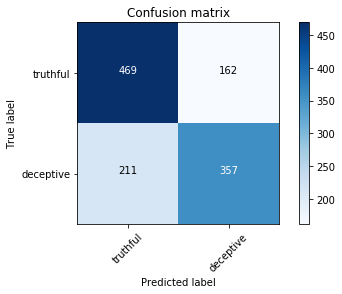

In [31]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_train)
score = metrics.accuracy_score(y_train, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_train, pred, labels=class_labels)
plot_confusion_matrix(cm, classes=class_labels)
print(classification_report(y_train, pred))

In [32]:
print(classification_report(y_train, pred))

             precision    recall  f1-score   support

  deceptive       0.69      0.63      0.66       568
   truthful       0.69      0.74      0.72       631

avg / total       0.69      0.69      0.69      1199



In [33]:
feature_names = count_vectorizer.get_feature_names()
# Truthful
print([f for _, f in sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]])
# Deceptive
print([f for _, f in sorted(zip(clf.coef_[0], feature_names))[:20]])

['night', 'day', 'nights', 'morning', 'weekend', 'minutes', 'days', 'hour', 'week', 'year', 'years', 'hours', 'recently', 'minute', 'evening', '30', '10', 'past', 'second', 'later']
['0800', '100', '10th', '12am', '15th', '18', '1900', '1960', '1970s', '1st', '2000', '2011', '35', '47', '6am', 'afternoons', 'beautiful', 'big', 'dawn', 'evenings']


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
def plot_wordcloud(text):
    # Create and generate a word cloud image:
    # wordcloud = WordCloud().generate(text)
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image:
    plt.figure(figsize=(10, 15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [36]:
df = temporal_df.copy()

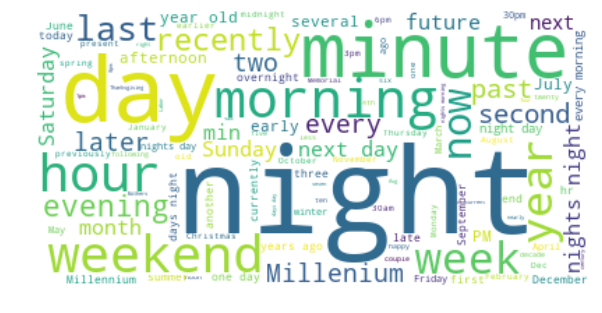

In [37]:
text = ','.join(df[df.deceptive=='truthful'].SUTime.values)
plot_wordcloud(text)

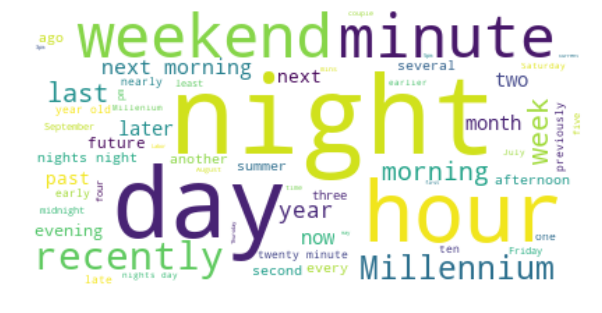

In [38]:
text = ','.join(df[df.deceptive=='deceptive'].SUTime.values)
plot_wordcloud(text)